# ---

# Machine Learning practico con la ayuda de Python
# Capitulo 11: Support Vector Machines

## Aldo Humberto Romero 

### BUAP, Marzo, 2022
---

## Setup

In [1]:
# commands prefaced by a % in Jupyter are called "magic"
# these "magic" commands allow us to do special things only related to jupyter

# %matplotlib inline - allows one to display charts from the matplotlib library in a notebook
# %load_ext autoreload - automatically reloads imported modules if they change
# %autoreload 2 - automatically reloads imported modules if they change
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext watermark
%watermark

Last updated: 2022-05-02T15:41:23.306230+02:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.0.1

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit



In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [4]:
%watermark -iv

matplotlib: 3.5.1
numpy     : 1.21.5
sklearn   : 1.0.2



# Support Vector Machines

EL metodo de Support Vector Machine (SVM) es un modelo de ML capaz de ejecutar clasificaciones lineales y no lineales. Es uno de los algoritmos que todo practicante de ML deberia de tener en su arsenal!.

Es un clasificador que discrimina encontrando un hiperplano que separa los datos entre si en un espacio de n-dimensiones, donde $n$ es la dimension de los datos de entrada. El algoritmo se basa en aprendizaje supervisado, en el que datos con etiquetas son suministrados al algoritmo y este da como salida el hiperplano optimo que categoriza los datos que luego puede ser usado para categorizar datos no usados para entrenar el algoritmo. 

<img src="fig/SVM_Ejemplo.png" alt="Que es SVM">

Pero en el SVM, se busca es el plano que separa los datos pero que lo hace de tal manera que maximiza las distancias como:

<img src="fig/SVM_Optimo.png" alt="Que es SVM">

Volvamos al conjunto de datos Iris para entender como trabajar el SVM en solo 4 dimensiones.

# Datos Iris

Primero, bajamos los datos y de ahi seleccionamos solo las columnas correspon diente a los petalos (longitud y ancho) para la setosa o versicolor. Esto es solo para el ejemplo considerado aqui!. Antes vimos que la setosa y versicolor estan muy bien separados. EN este caso en particular, decimos que las dos clases son **linealmente separables**.

In [5]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # lontidug y ancho del petalo 
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

## Iris-Setosa vs Iris-Versicolor

Solo graficando la longitud y el acho del petalo, vemos como claramente los datos estan bien separados. Sin embargo la pregunta que tratamos de resolver ahora dice: cual es la linea que separa estos dos conjuntos? si nuevos conjuntos de datos son obtenidos, para los que nosotros no conocemos previamente a que clase pertenecen, como los clasificamos?

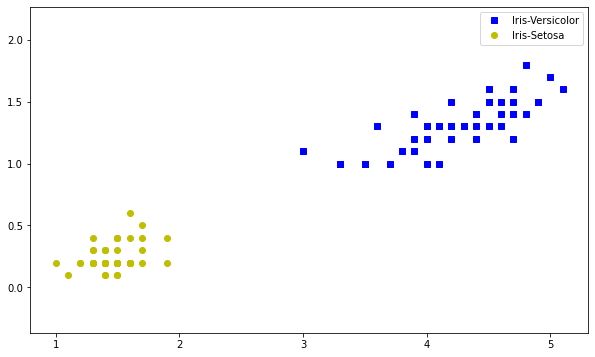

In [6]:
fig, axes = plt.subplots(figsize=(10,6))

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.legend()
axes.set_aspect('equal', 'datalim')

La solucion puede ser dibujar una linea entre estos dos conjuntos y cualesquiera que sean el nuevo (o nuevos) datos, solo tenemos que ver en que region cae.


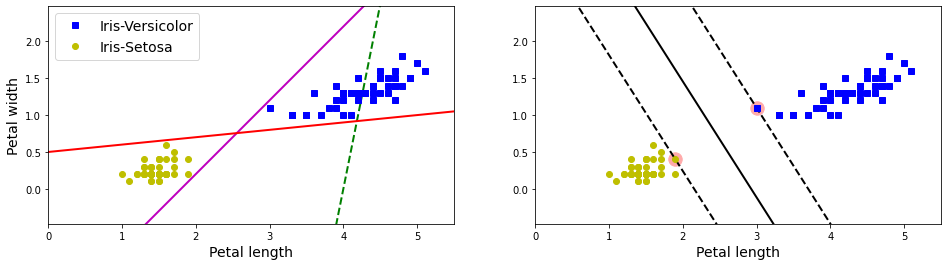

In [7]:
# Hagamos un modelo que aunque resuelve la pregunta, es un mal modelo.
# y comparemoslo con el que se obtiene con el SVM
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax, axes=None):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    if axes is None:
        axes=plt.gca()
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    axes.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    axes.plot(x0, decision_boundary, "k-", linewidth=2)
    axes.plot(x0, gutter_up, "k--", linewidth=2)
    axes.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

axes[0].plot(x0, pred_1, "g--", linewidth=2)
axes[0].plot(x0, pred_2, "m-", linewidth=2)
axes[0].plot(x0, pred_3, "r-", linewidth=2)
axes[0].plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
axes[0].plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
axes[0].set_xlabel("Petal length", fontsize=14)
axes[0].set_ylabel("Petal width", fontsize=14)
axes[0].legend(loc="upper left", fontsize=14)
axes[0].axis([0, 5.5, 0, 2])
axes[0].set_aspect('equal', 'datalim')

plot_svc_decision_boundary(svm_clf, 0, 5.5, axes[1])
axes[1].plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
axes[1].plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
axes[1].set_xlabel("Petal length", fontsize=14)
axes[1].axis([0, 5.5, 0, 2]);
axes[1].set_aspect('equal', 'datalim')

Como puedes ver, hay diferentes maneras de dibujas las lineas que separan los datos. En SVM usamos la linea que se ve an la derecha y los dos puntos marcados se suelen llamar **vectores de soporte o supporting vectors**.

# Detalle: Sencitividad a las escalas de los datos

SVMs son muy sensitivos al escalamiento de los datos de entrada. Scikit-learn provere una funcion `StandardScaler` que transforma los datos de tal manera que los datos lucen mas esparcidos. 


`StandardScaler` trabaja removiendo la media y escalando la dispersion de los datos de tal manera que al final tenga dispersion unidad. 

Por lo tanto, los nuevos datos son calculados como 

\begin{equation}
z = \frac{x - u}{s}
\end{equation}

donde $u$ es la media de los datos de entrenamiendo o tambien puede ser cero si definimos el argumento opcional 
`with_mean=False`, y $s$  es la desviacion estandar de los datos de entrenamiento o puede ser uno con el argumento opcional `with_std=False`.

(-2.0, 2.0, -2.0, 2.0)

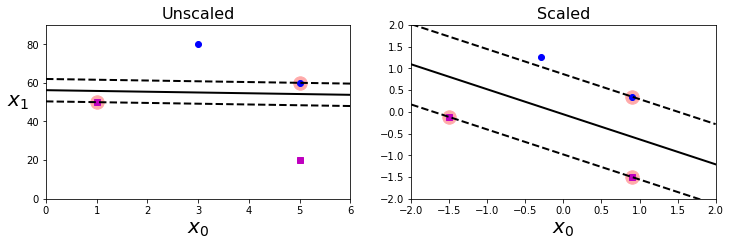

In [8]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

# Sensitividad a datos "atipicos"

Otro problema que puede afectar el SVM es la presencia de datos atipicos (outliers). Estos puntos son puntos que estan "lejos" de la mayoria de observaciones. 

(0.0, 5.5, 0.0, 2.0)

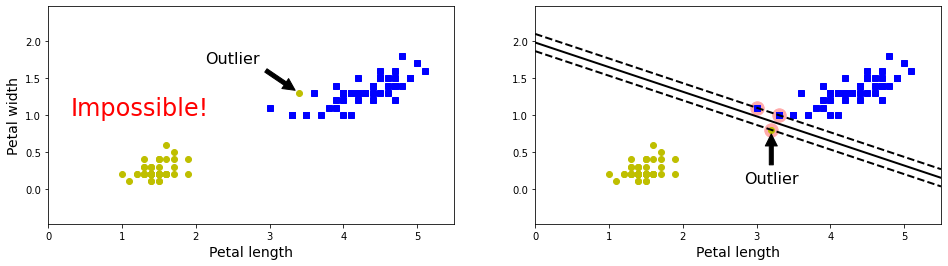

In [9]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(16,4))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.gca().set_aspect('equal', 'datalim')
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plt.gca().set_aspect('equal', 'datalim')
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

La deteccion de estos puntos esta fuera la discusion de este notebook pero si quieren mas informacion, este puede ser encontrado en [Scikit Documentation](https://scikit-learn.org/stable/modules/outlier_detection.html)

<img src="fig/outliers.png" alt="Several methods of outlier detection" style="width:800px">

# Demasiado margen *vs* violaciones de margen 

Bueno ya sabemos que tenemos que hacer escalamiento antes de hacer el SVM, por lo tanto creamos un pipeline como hemos hecho antes.

In [10]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [11]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## Clasificacion usando un margen suave 

Por un lado, la separabilidad lineal es algo en lo que no podemos dependet ya que en muchas ocasiones las caracteristicas de los datos se sobrelapan dentro del rango. Especialmente si hay presencia de "outliers". Lo que entonces uno puede hacer es relajar un poco la condicion de separacion y permitir que algunos puntos quedemos erroneamente clasificados. El hiperparametro C de SVM permite hacer eso. Cuando el valor es 1, el algoritmo trata de mazimizar el marge de tal manera que las violaciones del margen son fuertemente penalizadas. De otro ladom un valor mas grande de C incrementa el marge a un costo mas grande, permitiendo que algunos puntos queden erroneamente clasificados. 

In [12]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=10, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge', random_state=42))])

In [13]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

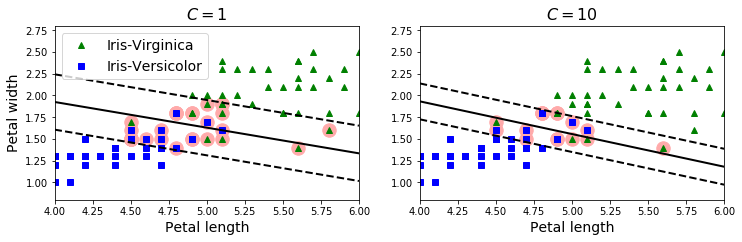

In [11]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])


plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])


# Clasificacion no-lineal

Hasta ahora, nosotros hemos usado `LinearSVC` porque hemos asumido que la separacion entre los datos es lineal. Sin embargo,. muchos conjuntos de datos no siguen la separabilidad lineal. Un metodo que podemos usar es usar funciones no lineales para "mapear" los datos de tal manera que la separabilidad de los datos mapeados sea lineal.

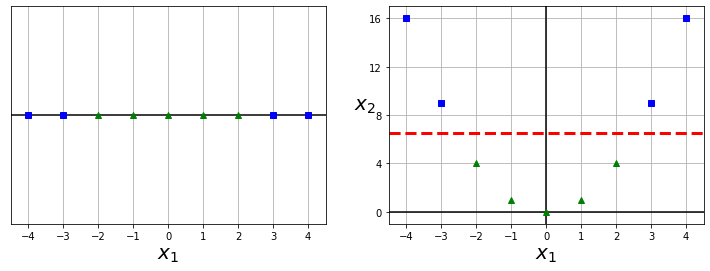

In [14]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)


### Recuerdan como general datos de medias lunas?

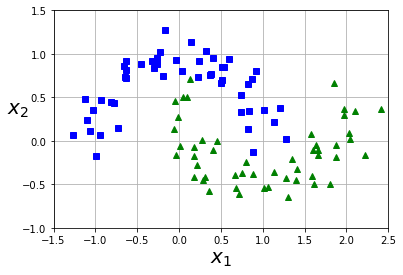

In [15]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [16]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/Users/aldoromero/.local/lib/python3.9/site-packages/scikit_learn-1.0.2-py3.9-macosx-11.0-arm64.egg/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

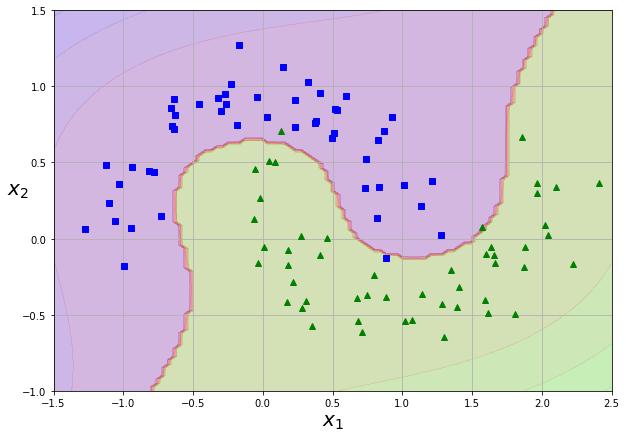

In [17]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

fig, axes=plt.subplots(figsize=(10,7))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [18]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [19]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Text(0.5, 1.0, '$d=10, r=100, C=5$')

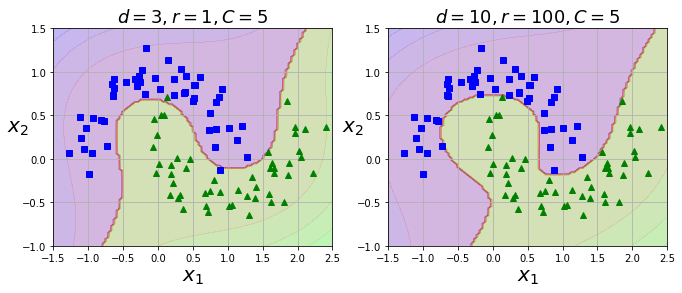

In [18]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)